In [17]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [37]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                    [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                    [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                    [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                    [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                    [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                    [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                    [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                    [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                    [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [38]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [39]:
for i, u1 in enumerate(ratings):
    most_similar_user_index = 0
    most_similar_cosine = -1.0
    
    for j, u2 in enumerate(ratings):
        if i == j:
            continue
        cur_cosine = cosine(u1, u2)
        if cur_cosine > most_similar_cosine:
            most_similar_cosine = cur_cosine
            most_similar_user_index = j
    
    print(i, most_similar_user_index)

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=5) 
pca.fit(ratings)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
pca.explained_variance_ratio_

array([0.25373748, 0.1970209 , 0.14113306, 0.12956371, 0.11289928])

In [46]:
components = pca.transform(ratings)
components

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [5]:
def f(x):
    return 2 * np.tan(np.sin(x) + np.cos(2 * x + 3)) * (np.cos(x) - 2 * np.sin(2 * x + 3)) / (np.cos(np.sin(x) + np.cos(2 * x + 3)) ** 2)

In [6]:
f(1)

55.38591763533786

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [6]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [7]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [8]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [27]:
# minimize(f, fx, method='COBYLA')

     fun: -7.540461684362333
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 230
  status: 1
 success: True
       x: array([  0.04447773, -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092])

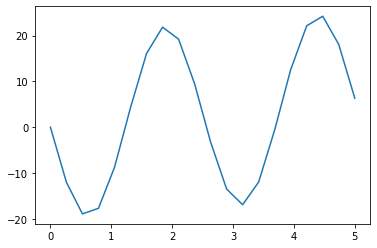

In [9]:
plt.plot(x, fx)
plt.show()

In [10]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [11]:
minimize(error,(0,0), method = 'COBYLA')

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [2]:
import random
import seaborn

from numpy.random import choice
from scipy.stats import *

%matplotlib inline

(array([ 1.,  0.,  0.,  0.,  4.,  3.,  3.,  6.,  6.,  7., 11., 16., 16.,
        15., 18., 23., 28., 22., 41., 36., 57., 43., 60., 49., 45., 48.,
        37., 50., 44., 52., 34., 36., 31., 27., 22., 22., 15., 16., 12.,
        10., 10.,  6.,  2.,  4.,  3.,  0.,  4.,  1.,  3.,  1.]),
 array([14.35 , 14.749, 15.148, 15.547, 15.946, 16.345, 16.744, 17.143,
        17.542, 17.941, 18.34 , 18.739, 19.138, 19.537, 19.936, 20.335,
        20.734, 21.133, 21.532, 21.931, 22.33 , 22.729, 23.128, 23.527,
        23.926, 24.325, 24.724, 25.123, 25.522, 25.921, 26.32 , 26.719,
        27.118, 27.517, 27.916, 28.315, 28.714, 29.113, 29.512, 29.911,
        30.31 , 30.709, 31.108, 31.507, 31.906, 32.305, 32.704, 33.103,
        33.502, 33.901, 34.3  ]),
 <a list of 50 Patch objects>)

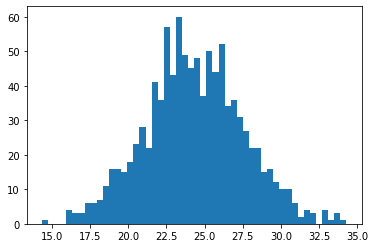

In [22]:
means = []
for i in range(1000):
    data = np.random.randint(50, size=20)
    means.append(data.mean())

plt.hist(means, bins=50)

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [35]:
A = np.array([[1, 4], [1, 1]])

v, w = np.linalg.eig(A)
w = np.transpose(w)
print('Собственные значения:', *v)
print('Собственные вектора (x, y):', *w)

Собственные значения: 3.0000000000000004 -0.9999999999999996
Собственные вектора (x, y): [0.89442719 0.4472136 ] [-0.89442719  0.4472136 ]
